In [1]:
#IMPORTAMOS LO NECESARIO
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns

In [2]:
#CARGAMOS LAS VARIABLES EN UN DF
df_original = pd.read_csv("C:/Users/Fran/Desktop/Facultad/Orga/tp3/Org-Datos-Grupo-19/train_data_final.csv")


#VERIFICO QUE SE HAYA CARGADO BIEN
df_original.tail()

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
276567,873580,288144823325d823e5f8a47dda65d2e0ed09a9f78bebcb...,2017-03-10,0.193743,0.533914,0.140841,0.126221,0.500161,0.158571,0.165877,...,NaN,NaN,1.008759,0.009847,0.979542,0.735387,1.000480,0.150231,0.276447,1
276568,262686,0c3757cb750959c88f6edf19609e7195ca8ff2b6f72a30...,2017-09-29,0.402107,0.914917,0.442733,0.000432,0.003491,NaN,0.436728,...,NaN,NaN,0.000951,0.006729,0.005159,NaN,0.007615,0.008715,0.005995,0
276569,5441718,fbd8d187c9f8a05016512f66707160b600434293b06ecf...,2017-09-23,0.841845,0.004404,0.010854,1.001861,0.004759,0.163909,0.007592,...,NaN,NaN,0.003941,0.007252,0.006897,NaN,0.008909,0.000816,0.006528,0
276570,2296570,6a1c7ee2ef483998bd91b42107b18b84ab3012f57e9f81...,2017-04-30,0.393324,0.117837,0.205245,0.015611,0.004225,0.564817,0.008934,...,NaN,NaN,0.008293,0.000285,0.009883,NaN,0.008599,0.004125,0.009582,1
276571,868216,28414f3556fae6250e04f6d0523d68f3a87fafa1e12c15...,2017-03-03,0.281986,0.000776,0.126253,0.157348,0.509473,0.267404,0.001177,...,NaN,NaN,0.005667,0.002016,0.002501,NaN,0.009089,0.008158,0.000012,1


In [3]:
#Como son casi 200 columnas, me fijo si alguna de ellas tiene muchos nulos >70% y si es asi veo como 
#los puedo solucionar

porcentaje_nulos = df_original.isnull().sum()
porcentaje_nulos = round(porcentaje_nulos/len(df_original)*100,2)


#Creo un dataframe con esos porcentajes y si son mayores a 70
total_nulos = pd.DataFrame(porcentaje_nulos,columns=["Porcentaje Nulos"])


#Donde 1=True, 0=False
total_nulos['Porcentaje de nulos'] = np.where(total_nulos['Porcentaje Nulos']>70,'Mayores a 70%',
    'Menores o iguales a 70%')

total_nulos


,Porcentaje Nulos,Porcentaje de nulos
Unnamed: 0,0.00,Menores o iguales a 70%
customer_ID,0.00,Menores o iguales a 70%
S_2,0.00,Menores o iguales a 70%
P_2,0.83,Menores o iguales a 70%
D_39,0.00,Menores o iguales a 70%
...,...,...
D_142,83.06,Mayores a 70%
D_143,1.86,Menores o iguales a 70%
D_144,0.74,Menores o iguales a 70%
D_145,1.86,Menores o iguales a 70%


In [4]:
#Elimino las primeras dos filas ya que modifican la cantidad de filas pero no el valor real de los datos
total_nulos = total_nulos.drop(['Unnamed: 0','customer_ID'])
total_nulos

,Porcentaje Nulos,Porcentaje de nulos
S_2,0.00,Menores o iguales a 70%
P_2,0.83,Menores o iguales a 70%
D_39,0.00,Menores o iguales a 70%
B_1,0.00,Menores o iguales a 70%
B_2,0.03,Menores o iguales a 70%
...,...,...
D_142,83.06,Mayores a 70%
D_143,1.86,Menores o iguales a 70%
D_144,0.74,Menores o iguales a 70%
D_145,1.86,Menores o iguales a 70%


<AxesSubplot:>

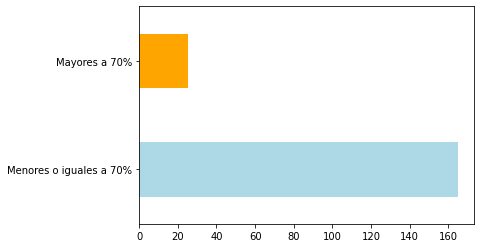

In [5]:
#Donde vemos la relacion entre verdaderos y falsos
total_nulos['Porcentaje de nulos'].value_counts().plot.barh(color=['lightblue','orange'])

In [6]:
#Verifico valores  entre 0 y 1

def valores_mayores_a_1(df):
#Sabemos que la primera columna es de IDS
    df_nuevo = df.iloc[:,1:]
    cant_valores=0
    limite = 1
    for columna in df_nuevo:
        col_aux=df_nuevo[columna]
        print(col_aux[col_aux>1].count())
        cant_valores+=col_aux[col_aux>1].count()

    return cant_valores


In [7]:
#Uso solo las variables numericas
df_cuantitativas = df_original.select_dtypes(include=['int', 'float'])
df_cuantitativas = df_cuantitativas.fillna(0)
df_cuantitativas = df_cuantitativas.drop(['target'],axis=1)

df_cuantitativas


,Unnamed: 0,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,2518955,0.947242,0.002204,0.008002,1.007516,0.002830,0.453227,0.005992,0.005186,0.000000,...,0.0,0.0,0.0,0.003183,0.005264,0.007173,0.000000,0.009359,0.004306,0.002719
1,1781039,0.757648,0.002076,0.008751,0.814083,0.000408,0.155700,0.004156,0.008291,0.000000,...,0.0,0.0,0.0,1.000928,0.005655,0.891417,0.149070,1.009381,0.007953,0.095926
2,1488700,0.392041,0.005770,0.029682,0.810262,0.006672,0.180378,0.005028,0.001929,0.501931,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3174307,0.673978,0.588604,0.295201,0.024650,0.007951,0.125583,0.008760,0.557215,0.000000,...,0.0,0.0,0.0,0.003558,0.008268,0.000429,0.000000,0.005009,0.003020,0.002798
4,1379981,0.778075,0.006930,0.056721,0.819369,0.004922,0.089214,0.006884,0.012943,0.000000,...,0.0,0.0,0.0,0.004670,0.000125,0.003151,0.000000,0.008442,0.000819,0.000342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276567,873580,0.193743,0.533914,0.140841,0.126221,0.500161,0.158571,0.165877,0.655083,0.000000,...,0.0,0.0,0.0,1.008759,0.009847,0.979542,0.735387,1.000480,0.150231,0.276447
276568,262686,0.402107,0.914917,0.442733,0.000432,0.003491,0.000000,0.436728,0.435263,0.000000,...,0.0,0.0,0.0,0.000951,0.006729,0.005159,0.000000,0.007615,0.008715,0.005995
276569,5441718,0.841845,0.004404,0.010854,1.001861,0.004759,0.163909,0.007592,0.005711,0.000000,...,0.0,0.0,0.0,0.003941,0.007252,0.006897,0.000000,0.008909,0.000816,0.006528
276570,2296570,0.393324,0.117837,0.205245,0.015611,0.004225,0.564817,0.008934,0.162835,0.132112,...,0.0,0.0,0.0,0.008293,0.000285,0.009883,0.000000,0.008599,0.004125,0.009582


In [8]:
#La cantidad (supuestamente) de valores mayores a 1 por columna, el primer valor es de los indices
greater_than_1 = valores_mayores_a_1(df_cuantitativas)
print(greater_than_1)

7006
2848
2882
91006
6086
2223
2732
2902
381
1945
3364
2840
2894
2798
11733
2124
2971
2701
263
2835
2940
120131
1130
6020
2763
2690
6935
2794
2771
727
2763
2901
66335
270836
7220
2237
2843
9082
3002
1289
2846
3069
2894
1292
2760
3178
37288
2627
2779
3114
2402
2822
51069
38346
102610
11475
0
40991
258315
2729
2790
11048
2740
2650
3988
4328
2874
2810
2902
2939
29
3144
2995
3055
322
2702
2756
1957
2825
2713
5936
5582
5692
253
2699
3400
13065
3258
0
8914
1884
2793
268865
2792
1
6296
2741
4216
4036
4806
196
2731
7237
9057
0
0
0
3
0
1
4849
6299
3410
4176
4504
167931
10
1029
86
3925
22831
2779
4841
3852
871
8608
4810
2845
5281
2861
2765
2864
125119
5362
1368
275
5701
0
2907
305
239511
218521
90
483
658
1264
172
230852
2817
2080
3108
0
2801
0
188871
2784
2790
0
2756
5779
12019
3159
19555
0
28271
142309
118039
5785
41
53380
4342
276
2792
239
809
231
166
90
232
46855
5966
3474
473
46811
2947
3056
3481688


In [9]:
#Veo que tambien hay valores negativos 
print(df_original['P_2'].max())
print(df_original['P_2'].min())


1.0099994697314765
-0.4403368203886073


4.81966993844126
1.2950453317506216e-08


Text(0.5, 1.0, 'Busqueda de Outliers en la columnda D_145')

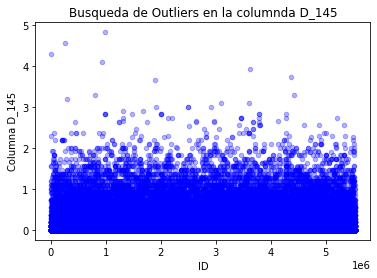

In [37]:
#Busco los valores maximos totales y minimos totales
print(df_original['D_145'].max())
print(df_original['D_145'].min())

df_original.plot.scatter(x='Unnamed: 0',y='D_145',color='blue',alpha=0.3)
plt.xlabel('ID')
plt.ylabel('Columna D_145')
plt.title('Busqueda de Outliers en la columnda D_145')

Text(0.5, 1.0, 'Busqueda de Outliers en la columnda P_2')

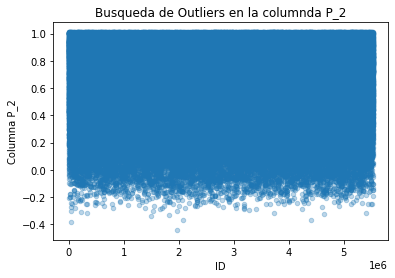

In [38]:
#Graficamente lo vemos con una columna de ejemplo 'P_2'
df_original.plot.scatter(x='Unnamed: 0',y='P_2',style='.',alpha=0.3)
plt.xlabel('ID')
plt.ylabel('Columna P_2')
plt.title('Busqueda de Outliers en la columnda P_2')

In [12]:
#Si quisiera ver todos los scatter
'''
for columna in df_cuantitativas:
    df_cuantitativas.plot.scatter(x='Unnamed: 0',y=columna)
'''    

"\nfor columna in df_cuantitativas:\n    df_cuantitativas.plot.scatter(x='Unnamed: 0',y=columna)\n"

72.11228310701753 4.408978992842538e-07
0.0194335140102812 0.09363449602560452


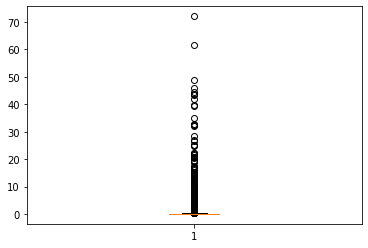

In [28]:
#Pruebo otra columna pero con un boxplot para verificar 
ej = df_cuantitativas['B_12']
print(ej.max(),ej.min())
print(ej.median(),ej.mean())

plot1 = plt.boxplot(ej)
#plot2 = plt.hlines(y=50,xmin=0,xmax=2)

plt.show()